# ROC AUC

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# checking the percentage unique

for col in data.columns :
    print(" col_name : ", col, " unique percentage : ", len(data[col].unique())/len(data))

 col_name :  RowNumber  unique percentage :  1.0
 col_name :  CustomerId  unique percentage :  1.0
 col_name :  Surname  unique percentage :  0.2932
 col_name :  CreditScore  unique percentage :  0.046
 col_name :  Geography  unique percentage :  0.0003
 col_name :  Gender  unique percentage :  0.0002
 col_name :  Age  unique percentage :  0.007
 col_name :  Tenure  unique percentage :  0.0011
 col_name :  Balance  unique percentage :  0.6382
 col_name :  NumOfProducts  unique percentage :  0.0004
 col_name :  HasCrCard  unique percentage :  0.0002
 col_name :  IsActiveMember  unique percentage :  0.0002
 col_name :  EstimatedSalary  unique percentage :  0.9999
 col_name :  Exited  unique percentage :  0.0002


In [5]:
# deleting RowNumber, CustomerId and Surname

data = data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
import pickle

def save_object(obj, name):
    pickle_obj = open(f"{name}.pck", "wb")
    pickle.dump(obj, pickle_obj)
    pickle_obj.close()

In [7]:
# Label encode the Object Datatypes
from sklearn.preprocessing import LabelEncoder

d_types = dict(data.dtypes)

for name, type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])
        
        # Label encoding code
        save_object(Le, f"Label_Encoder_{name}")

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# one hot encode "Geography"
# optional

from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
encodings = onehotencoder.fit_transform(data['Geography'].values.reshape(-1,1)).toarray()
save_object(onehotencoder, "OneHotEncoder_Geography")

#values = dict(data["Geography"].value_counts())
values = data["Geography"].unique()

for val in values:
    data["Geography_" + str(val)] = encodings[:,val]
    
data = data.drop(["Geography"], axis = 1)

data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_2,Geography_1
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [10]:
remaining_columns = list(data.columns)
remaining_columns.remove("Exited")

In [11]:
save_object(remaining_columns, "columns")

In [12]:
# Feature and Target vector

X = data[remaining_columns].values
Y = data['Exited'].values.astype(np.uint8)

In [13]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=4)

In [14]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

save_object(Scaler, "Scaler")

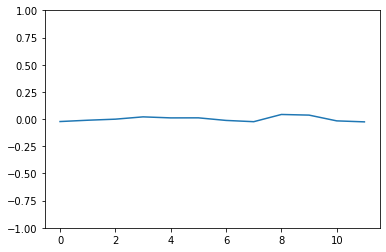

In [15]:
# check whether data is standardized or not
# mean should be 1

plt.ylim(-1,1)

means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means, scaley=False)

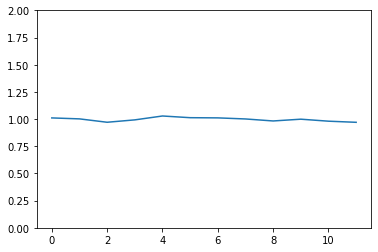

In [16]:
# check variances
# means does not vary much from 0, and variance does not vary far from 1,
# which means that test and train set are not very different.

plt.ylim(0,2)

vars = []
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(Xtrain, Ytrain)

predictions = model.predict(Xtest)
pred_probs = model.predict_proba(Xtest)

In [18]:
# sample probabilities

pred_probs[:3]

array([[0.78851495, 0.21148505],
       [0.85005476, 0.14994524],
       [0.89806886, 0.10193114]])

In [19]:
# Get the probs of only Churn = "1"

pred_probs = pred_probs[:, 1]

Metrics

[[1549   55]
 [ 302   94]]


<AxesSubplot:>

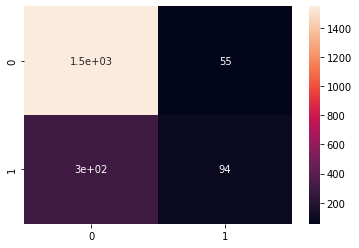

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,\
                            recall_score, roc_curve, roc_auc_score

matrix = confusion_matrix(Ytest, predictions)
print(matrix)
sns.heatmap(matrix, annot=True)

In [21]:
def Accuracy(Truths, Predictions):
    return np.mean(Truths == Predictions)

print("Validation Accuracy : ", Accuracy(Ytest, predictions))

Validation Accuracy :  0.8215


In [22]:
# Checking precision

print("Precision : ", precision_score(Ytest, predictions))

Precision :  0.6308724832214765


In [23]:
# Checking recall

print("Precision : ", recall_score(Ytest, predictions))

Precision :  0.23737373737373738


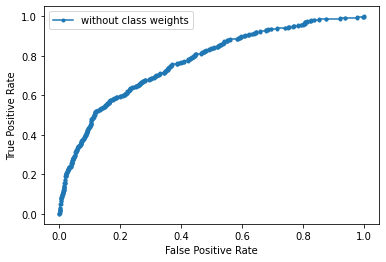

In [24]:
Fpr, Tpr, _ = roc_curve(Ytest, pred_probs)

plt.plot(Fpr, Tpr, marker='.', label='without class weights')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [25]:
Auc = roc_auc_score(Ytest, pred_probs)
print(" Area Under Curve : ", Auc)

 Area Under Curve :  0.770071349404267


Applying Class Weights

In [26]:
# finding class weights

value_counts = dict(data["Exited"].value_counts())
print(value_counts)

{0: 7963, 1: 2037}


In [27]:
class_weights = {0 : 20.37, 1 : 79.63}

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight=class_weights)
model.fit(Xtrain, Ytrain)

predictions = model.predict(Xtest)
save_object(model, "MyModel")
pred_probs = model.predict_proba(Xtest)

In [29]:
# Get the probs of only Churn = "1"

pred_probs = pred_probs[:, 1]

[[1128  476]
 [ 120  276]]


<AxesSubplot:>

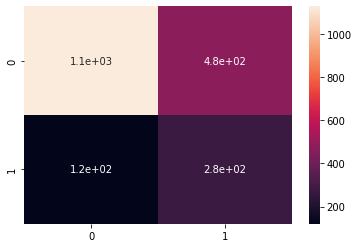

In [30]:
matrix = confusion_matrix(Ytest, predictions)
print(matrix)
sns.heatmap(matrix, annot=True)

In [31]:
def Accuracy(Truths, Predictions):
    return np.mean(Truths == Predictions)

print("Validation Accuracy : ", Accuracy(Ytest, predictions))

Validation Accuracy :  0.702


In [32]:
# Checking precision

print("Precision : ", precision_score(Ytest, predictions))

Precision :  0.3670212765957447


In [33]:
# Checking recall

print("Precision : ", recall_score(Ytest, predictions))

Precision :  0.696969696969697


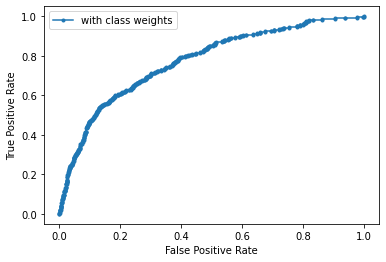

In [34]:
Fpr, Tpr, _ = roc_curve(Ytest, pred_probs)

plt.plot(Fpr, Tpr, marker='.', label='with class weights')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [35]:
Auc = roc_auc_score(Ytest, pred_probs)
print(" Area Under Curve : ", Auc)

 Area Under Curve :  0.7736104813723268


### Realtime Prediction

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [37]:
def load_object(name):
    pickle_obj = open(f"{name}.pck", "rb")
    obj = pickle.load(pickle_obj)
    return obj

In [38]:
# Load the Data Point

data = pd.read_csv("Churn_Modelling.csv")

to_be_predicted = data.iloc[10,:].values

col_names = data.columns
predict_dict = {}

for col_name, val in zip(col_names, to_be_predicted):
    predict_dict[col_name] = val
    
print(predict_dict)

{'RowNumber': 11, 'CustomerId': 15767821, 'Surname': 'Bearce', 'CreditScore': 528, 'Geography': 'France', 'Gender': 'Male', 'Age': 31, 'Tenure': 6, 'Balance': 102016.72, 'NumOfProducts': 2, 'HasCrCard': 0, 'IsActiveMember': 0, 'EstimatedSalary': 80181.12, 'Exited': 0}


In [39]:
del predict_dict["RowNumber"]
del predict_dict["CustomerId"]
del predict_dict["Surname"]

In [40]:
real_output = predict_dict["Exited"]
del predict_dict["Exited"]

In [41]:
predict_dict["Gender"] = load_object("Label_Encoder_Gender").transform(np.array(predict_dict["Gender"]).reshape(-1,))[0]

In [42]:
predict_dict["Geography"] = load_object("Label_Encoder_Geography").transform(np.array(predict_dict["Geography"]).reshape(-1,))[0]

In [43]:
predict_dict

{'CreditScore': 528,
 'Geography': 0,
 'Gender': 1,
 'Age': 31,
 'Tenure': 6,
 'Balance': 102016.72,
 'NumOfProducts': 2,
 'HasCrCard': 0,
 'IsActiveMember': 0,
 'EstimatedSalary': 80181.12}

In [44]:
predict_dict["Geography_ohe"] = load_object("OneHotEncoder_Geography").transform(predict_dict["Geography"].reshape(-1,1)).toarray()[0]

In [45]:
predict_dict

{'CreditScore': 528,
 'Geography': 0,
 'Gender': 1,
 'Age': 31,
 'Tenure': 6,
 'Balance': 102016.72,
 'NumOfProducts': 2,
 'HasCrCard': 0,
 'IsActiveMember': 0,
 'EstimatedSalary': 80181.12,
 'Geography_ohe': array([1., 0., 0.])}

In [46]:
del predict_dict["Geography"]

In [47]:
for e, i in enumerate(predict_dict["Geography_ohe"]):
    predict_dict["Geography_" + str(e)] = i

In [48]:
del predict_dict["Geography_ohe"]

In [49]:
predict_dict

{'CreditScore': 528,
 'Gender': 1,
 'Age': 31,
 'Tenure': 6,
 'Balance': 102016.72,
 'NumOfProducts': 2,
 'HasCrCard': 0,
 'IsActiveMember': 0,
 'EstimatedSalary': 80181.12,
 'Geography_0': 1.0,
 'Geography_1': 0.0,
 'Geography_2': 0.0}

In [50]:
# Lets make the main array

col_sequence = load_object("columns")
array = []

for col_name in col_sequence:
    array.append(predict_dict[col_name])
    
array = np.array(array)

print(array)

[5.2800000e+02 1.0000000e+00 3.1000000e+01 6.0000000e+00 1.0201672e+05
 2.0000000e+00 0.0000000e+00 0.0000000e+00 8.0181120e+04 1.0000000e+00
 0.0000000e+00 0.0000000e+00]


In [51]:
array = load_object("Scaler").transform(array.reshape(1, -1))

In [52]:
prediction = load_object("MyModel").predict(array)[0]
print(prediction)

0


In [53]:
print(" Original : ", real_output, " Predicted : ", prediction)

 Original :  0  Predicted :  0
